<a href="https://colab.research.google.com/github/tanupunjani/Mastering-tensorflow/blob/main/Transfer_learning_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer learning with Tensorflow - Fine Tuning

In [2]:
#Check if we are using GPU
!nvidia-smi 

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



#Create helper functions

###Writing all the functions in one script so that you can download them istead of rewriting them again and again. 

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-08-12 18:38:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-12 18:38:18 (63.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
#Import the helper functions that we are going to use in this notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

#Dont forget to redownload it while running the colab again as it deletes the file

#Getting the data

In [5]:
#Getting the 10% of the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2021-08-12 18:38:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   170MB/s    in 0.9s    

2021-08-12 18:38:22 (170 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
#Checking the directories and images in the dataset
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

In [7]:
#Create training and test sets
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [8]:
import tensorflow as tf

Image_size = (224,224)
Batch_size = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size = Image_size,
                                                                            label_mode = "categorical",
                                                                            batch_size = Batch_size)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=Image_size,
                                                                label_mode="categorical",
                                                                batch_size=Batch_size)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [10]:
#check out the classes of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
#See example of the batch size
for images, labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[2.54000000e+02 2.55000000e+02 2.47000000e+02]
   [2.54000000e+02 2.55000000e+02 2.47000000e+02]
   [2.54000000e+02 2.55000000e+02 2.47000000e+02]
   ...
   [1.29994049e+02 1.08565529e+02 1.25351265e+02]
   [8.93520279e+01 6.91581650e+01 8.85612335e+01]
   [9.18929443e+01 7.40664597e+01 9.34796982e+01]]

  [[2.54000000e+02 2.55000000e+02 2.47000000e+02]
   [2.54000000e+02 2.55000000e+02 2.47000000e+02]
   [2.54000000e+02 2.55000000e+02 2.47000000e+02]
   ...
   [1.60672684e+02 1.37871643e+02 1.53387009e+02]
   [9.97906189e+01 7.70763626e+01 9.69385910e+01]
   [9.32197113e+01 7.30258942e+01 9.20973206e+01]]

  [[2.54000000e+02 2.55000000e+02 2.47000000e+02]
   [2.54000000e+02 2.55000000e+02 2.47000000e+02]
   [2.54000000e+02 2.55000000e+02 2.47000000e+02]
   ...
   [1.96029953e+02 1.71601379e+02 1.85218750e+02]
   [1.12632362e+02 8.80915680e+01 1.03861969e+02]
   [8.71530762e+01 6.46531448e+01 8.11530380e+01]]

  ...

  [[2.44775467e+02 2.19066254e+02 1.22137741e+02]
   [2

#Model 0 : Building transfer learning feature extraction model using Keras Functional API

The sequential API is straight-forward, it runs layers in sequential order

But the functional API gives us some more flexibility with our models 

In [12]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so that the underlying pretrained patterns are not updated while training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. If using a model like ResNet50V2 you will need to normalize inputs (you don't have to for EfficientNet(s))
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the input to the base_model
x = base_model(inputs)
print(f"shape after passing the inputs through the base model: {x.shape}")

# 6.Average pool the outputs of the base model (aggregrate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# 7.Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="ouput_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compilt the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#10. Fit the model
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch = len(train_data_10_percent),
                                 validation_data = test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                        experiment_name="10_percent_feature_extraction")] )

16711680/16705208 [==============================] - 0s 0us/step
shape after passing the inputs through the base model: (None, 7, 7, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20210812-183828
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 86s 3s/step - loss: 1.9412 - accuracy: 0.3667 - val_loss: 1.3908 - val_accuracy: 0.6661
Epoch 2/5
24/24 [==============================] - 79s 3s/step - loss: 1.1692 - accuracy: 0.7333 - val_loss: 0.9213 - val_accuracy: 0.8010
Epoch 3/5
24/24 [==============================] - 68s 3s/step - loss: 0.8447 - accuracy: 0.8067 - val_loss: 0.7503 - val_accuracy: 0.8224
Epoch 4/5
24/24 [==============================] - 69s 3s/step - loss: 0.6975 - accuracy: 0.8373 - val_loss: 0.6422 - val_accuracy: 0.8339
Epoch 5/5
24/24 [==============================] - 69s 3s/step - loss: 0.5900 - accuracy: 0.8573 - val_loss: 0.6041 - val_accuracy: 0.8322


In [13]:
#Evaluate on full dataset
model_0.evaluate(test_data)

79/79 [==============================] - 125s 2s/step - loss: 0.6105 - accuracy: 0.8456


[0.6104986667633057, 0.8456000089645386]

In [14]:
#Check the layers in our model

for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [15]:
#SUMMARY
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [16]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
ouput_layer (Dense)          (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


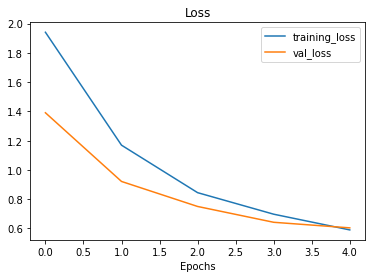

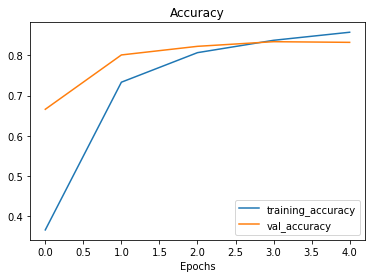

In [17]:
#Check the loss curves
plot_loss_curves(history_10_percent)

#Getting a feature vector from a trained model

The tensor that passes through our base_model is (none, 7,7,1280) but it turns into (none, 1280).

Lets try with (1, 4, 4, 3) and the pass it in GlobalAveragePooling2D

In [18]:

# Define the input shape
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shape of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of Global Average Pooled 2D tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840445 -0.28855976]]

Shape of input tensor: (1, 4, 4, 3)
Shape of Global Average Pooled 2D tensor: (1, 3)


In [19]:
#trying reduced mean 
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

#Running a series of transfer learning experience

We have seen that transfer learning gave us incredible results with 10% of data. Now we need to see how it performs with 1% of data

* `.model_1` - use feature extraction with transfer learnng with 1% of training data with data augmentation
* `.model_2` - use feature extraction with transfer learnng with 10% of training data with data augmentation
* `model_3` - use fine-tuning with transfer learnng with 10% of training data with data augmentation
* `model_4` - use fine-tuning with transfer learnng with 100% of training data with data augmentation


# Note : the same dataset has been used for consistency 

#Getting and preprocessing the data for model_1

In [20]:
# Download and unzip data - preprocessed from Food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip 
unzip_data("10_food_classes_1_percent.zip")

--2021-08-12 18:47:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.128, 209.85.200.128, 209.85.234.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   167MB/s    in 0.8s    

2021-08-12 18:47:35 (167 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [21]:

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [22]:

# How many images are we working with?
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There a

In [23]:
# Setup data loaders 
Image_size = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=Image_size,
                                                                           batch_size=Batch_size) # default = 32

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=Image_size,
                                                                batch_size=Batch_size)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#Adding data augmentation right into our model
To add data augmentation we can use the layers inside :

* tf.keras.layers.experimental.preprocessing()

The two top benefits of using the data augmentation inside our model is :

* Preprocessing our images (augmenting them) happens on the GPU(much faster) than CPU.

* Image data augmentation happens only during training, so we can still export our whole model and use it elsewhere

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescale(1./255) # Keep for models like ResNet50V2 but EfficientNet's having resclaing built-in
],name="data_augmentation")

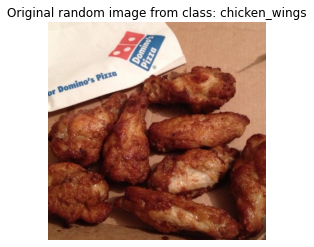

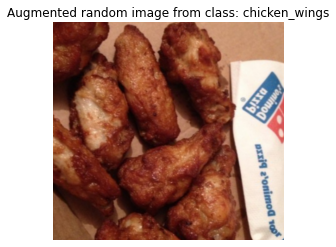

In [25]:
#Visualize the data
# View a random image and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# Read and plot in the random image 
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

# Now let's plot our augmented random image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);
# print(augmented_img)


#Model 1 : Feature extraction with transfer learning on 1% of data

In [26]:
#Setup input shape and base model, freezing the base model layers
input_shape = (224,224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

#Add in data augmentation sequential model as a layer
x = data_augmentation(inputs)

#Give base_model the inputs(after augmentation) and dont't train it
x = base_model(x, training=False)

#Pool output features of the base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

#Make a model using input and outputs
model_1 = keras.Model(inputs, outputs)
# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data=test_data,
                                validation_steps=int(0.25 * len(test_data)),
                                # Track model training logs
                                callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                       experiment_name="1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20210812-184740
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 43s 18s/step - loss: 2.4260 - accuracy: 0.0571 - val_loss: 2.2275 - val_accuracy: 0.1612
Epoch 2/5
3/3 [==============================] - 44s 21s/step - loss: 2.1452 - accuracy: 0.1571 - val_loss: 2.1057 - val_accuracy: 0.2714
Epoch 3/5
3/3 [==============================] - 35s 17s/step - loss: 2.0013 - accuracy: 0.3286 - val_loss: 1.9979 - val_accuracy: 0.3470
Epoch 4/5
3/3 [==============================] - 35s 17s/step - loss: 1.7927 - accuracy: 0.5571 - val_loss: 1.9052 - val_accuracy: 0.4276
Epoch 5/5
3/3 [==============================] - 45s 21s/step - loss: 1.6266 - accuracy: 0.6143 - val_loss: 1.8263 - val_accuracy: 0.4375


In [27]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [28]:
#Evaluate on the full dataset

results_1_percent = model_1.evaluate(test_data)
results_1_percent

79/79 [==============================] - 128s 2s/step - loss: 1.8229 - accuracy: 0.4684


[1.822882056236267, 0.4684000015258789]

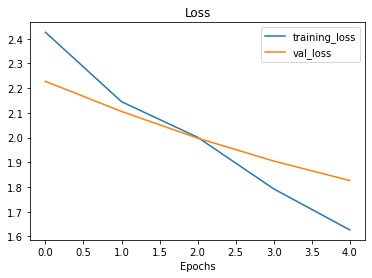

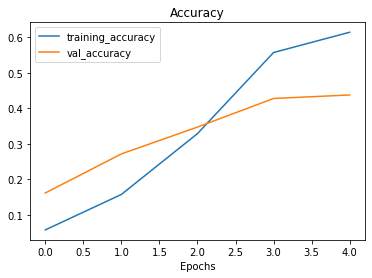

In [29]:
#Loss curve ofr 1% dataset
plot_loss_curves(history_1_percent)

#Model 2: feature extraction transfer learning model with 10% of data and data augmentation

In [30]:

# Get 10% of data... (uncomment if you don't have it)
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
# unzip_data(10_food_classes_10_percent)

train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [31]:
# How many images are in our directories?
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

In [32]:
#Set data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [33]:
# Create model 2 with data augmentation built in
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # if you're using a model such as ResNet50V2, you'll need to rescale your data, efficientnet has rescaling built-in
], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model (also called the backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create the inputs and outputs (including the layers in between)
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs) # augment our training images (augmentation doesn't occur on test data)
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, this also insures batchnorm layers don't get updated - https://keras.io/guides/transfer_learning/#build-a-model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Creating a model checkpoint

The ModelCheckpoint callback intermediately saves our model (the full model or just the weights) during training. This is useful so that we can come and start where we left of

In [34]:
#Set checkpoint path
checkpoint_path = "ten_perfcent_model_chekpoints_weights/checkpoint.ckpt"

#Create ModelCheckpoint callback which saves the weights of model only 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq = "epoch", #save every epoch,
                                                         verbose=1)

In [35]:
#Fit model 2 passing in the modelcheckpoints every epoch

initial_epochs =5

history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                 experiment_name="10_percent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20210812-185416
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 93s 4s/step - loss: 1.9997 - accuracy: 0.3453 - val_loss: 1.4880 - val_accuracy: 0.6579

Epoch 00001: saving model to ten_perfcent_model_chekpoints_weights/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 86s 4s/step - loss: 1.3660 - accuracy: 0.6760 - val_loss: 1.0561 - val_accuracy: 0.7796

Epoch 00002: saving model to ten_perfcent_model_chekpoints_weights/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 86s 4s/step - loss: 1.0505 - accuracy: 0.7440 - val_loss: 0.8353 - val_accuracy: 0.8141

Epoch 00003: saving model to ten_perfcent_model_chekpoints_weights/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 83s 4s/step - loss: 0.8865 - accuracy: 0.7840 - val_loss: 0.7385 - val_accuracy: 0.8240

Epoch 00004: saving model to ten_perfcent_model_chekpoints_weights/checkpoint.ckpt
Epoch 5/5
24/24 [==============================] - 85s 4s/step - loss: 0.7924 - accuracy: 0.7960 - val_loss: 0.6607 - 

In [36]:
model_0.evaluate(test_data)

79/79 [==============================] - 132s 2s/step - loss: 0.6105 - accuracy: 0.8456


[0.6104987859725952, 0.8456000089645386]

#Loading in the checkpointed weights

Loading in checkpointed weights returns a model to a specific checkpoint


In [37]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [38]:

# Evalaute model_2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 131s 2s/step - loss: 0.6842 - accuracy: 0.8196


In [39]:
# Check model_2 results on all test_data
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 131s 2s/step - loss: 0.6842 - accuracy: 0.8196


[0.6841788291931152, 0.819599986076355]

#Model-3 : Fine-tuning an existing model on 10% data

Fine-tuning usually works best after training a feature extraction model for a few epochs with large amounts of custom data

In [40]:
#layers in loaded model
model_2.layers

In [41]:
#Are these layers trainable ?
for layer in model_2.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f30be092b90> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f30bdfca210> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7f30b969c710> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7f30b974dbd0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f30b95f6410> True


In [42]:
#whar layers are in our base model which are trainable ?
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [43]:
#How many trainable variables are in our base model ?
print(len(model_2.layers[2].trainable_variables))

0


In [1]:
#Before starting fine-tuning, lets set the last 10 layers of our base_model.trainable = True
base_model.trainable = True

#Freeze all the layers except last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

#Recompile (we have to recompile our model everytime we make change)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001), #while fine-tuning you typically want to lower the learning rate by 10x* because you dont want them to train too much
                metrics=["accuracy"])



NameError: ignored

> **Note** : When fine-tuning its best practice to lower your learning rate. How muc ? This is a hyperparamter you can tune. But a good rule of thumb is 10x (though different resources will claim other values). A good resource of information on this is the ULMFIt paper : https://arxiv.org/abs/1801.06146

In [45]:
# Check which layers are tunable (trainable)
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [46]:
#Now that we have unfrozen some of the layers, how many trainable variables are there ?
print(len(model_2.trainable_variables))

12


In [47]:
#Fine-tune for another 5 epochs

fine_tune_epochs = initial_epochs + 5 

#Refit the model (same as model 2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               validation_steps=int(0.25 * len(test_data)),
                                               initial_epoch = history_10_percent_data_aug.epoch[-1], #(start training from previous last epoch)
                                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                      experiment_name="10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20210812-174240


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/10
24/24 [==============================] - 111s 4s/step - loss: 0.6950 - accuracy: 0.7987 - val_loss: 0.5885 - val_accuracy: 0.8207
Epoch 6/10
24/24 [==============================] - 148s 6s/step - loss: 0.5648 - accuracy: 0.8360 - val_loss: 0.5519 - val_accuracy: 0.8109
Epoch 7/10
24/24 [==============================] - 144s 6s/step - loss: 0.4807 - accuracy: 0.8480 - val_loss: 0.5296 - val_accuracy: 0.8273
Epoch 8/10
24/24 [==============================] - 146s 6s/step - loss: 0.4519 - accuracy: 0.8560 - val_loss: 0.5426 - val_accuracy: 0.8224
Epoch 9/10
24/24 [==============================] - 149s 6s/step - loss: 0.4277 - accuracy: 0.8587 - val_loss: 0.4670 - val_accuracy: 0.8470
Epoch 10/10
24/24 [==============================] - 148s 6s/step - loss: 0.3856 - accuracy: 0.8840 - val_loss: 0.5239 - val_accuracy: 0.8289


In [48]:
#Evaluate the fine-tuned model (model_3 which is actually model_2 fine-tuned for another 5 epochs)
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 181s 2s/step - loss: 0.4893 - accuracy: 0.8372


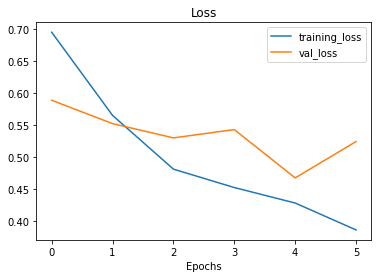

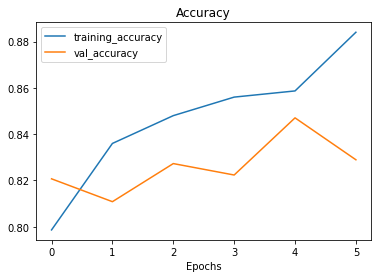

In [49]:
# Check out the loss curves of our fine-tuned model
plot_loss_curves(history_fine_10_percent_data_aug)

#The plot_loss_curves works best with the models that have fit once, however we want somwthing to compare one series of running fit() with another (eg. before and after fine-tuning)

In [50]:

# Let's create a function to compare training histories
def compare_historys(original_history, new_history, initial_epochs=5):
  """
  Compares two TensorFlow History objects.
  """
  # Get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with new_history metrics
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plot for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  # Make plot for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

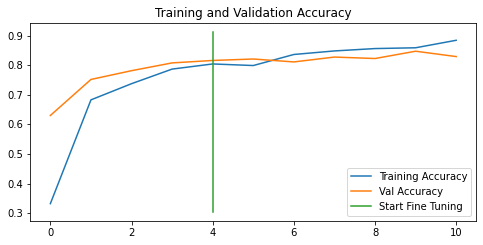

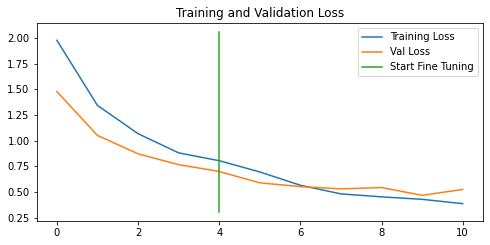

In [51]:
compare_historys(history_10_percent_data_aug,
                 history_fine_10_percent_data_aug,
                 initial_epochs=5)

#Model 4 : Fine-tuning an existing model on all of the data

In [52]:

# Download and unzip 10 classes of Food101 data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2021-08-12 18:02:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.181.128, 173.194.195.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.181.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   133MB/s    in 3.7s    

2021-08-12 18:02:05 (133 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [52]:

# Setup training and test dir
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [53]:
# How many images are we working with now?
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.

In [54]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [55]:

# Evaluate model 2 (this is the fine-tuned on 10 percent of data version)
model_2.evaluate(test_data)

79/79 [==============================] - 154s 2s/step - loss: 0.4899 - accuracy: 0.8396


[0.48986831307411194, 0.8396000266075134]

In [56]:
results_fine_tune_10_percent

[0.48986831307411194, 0.8396000266075134]

To train the fine-tuned model 4 we have to revert the model 2 back to its feature extraction weights

In [58]:
# Load weights from checkpoint, that way we can fine-tune from 
# the same stage the 10 percent data model was fine-tuned from
model_2.load_weights(checkpoint_path)

In [59]:
#View model_2
model_2.evaluate(test_data)

79/79 [==============================] - 153s 2s/step - loss: 0.6852 - accuracy: 0.8220


[0.6852214932441711, 0.8220000267028809]

In [ ]:

# Check to see if our model_2 has been reverted back to feature extraction results
results_10_percent_data_aug

#Summary of the previous steps

* Trained a feature extraction model with 10% of data with data augmentation for 5 epochs and we saved the model's weights through modelcheckpoint callback.
* Fine-tuned the same model on the same 10% of the data for a further 5 epochs with the top 10 layers of the base model frozen.
* Saved the results and the trained logs each time.
* Reloaded the model from step 1 to do the same steps as step 2 except this time we are using all of the data

In [60]:
# Check which layers are tunable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_2D True
4 output_layer True


In [61]:
# Let's drill into our base_model (efficientnetb0) and see what layers are trainable
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [62]:
# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Continue to train and fine-tune the model to our data (100% of training data)
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                  experiment_name="full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20210811-235944
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 583s 2s/step - loss: 0.7292 - accuracy: 0.7660 - val_loss: 0.3153 - val_accuracy: 0.9013
Epoch 6/10
235/235 [==============================] - 565s 2s/step - loss: 0.5972 - accuracy: 0.8071 - val_loss: 0.3351 - val_accuracy: 0.8882
Epoch 7/10
235/235 [==============================] - 574s 2s/step - loss: 0.5323 - accuracy: 0.8256 - val_loss: 0.2980 - val_accuracy: 0.9046
Epoch 8/10
  4/235 [..............................] - ETA: 8:38 - loss: 0.4189 - accuracy: 0.8672

Note: Fine-tuning generally takes longer per epoch (more layers being updated) and in the case of the model we just ran we used 10x more data than before (more patterns to find) so it makes sense training took longer.

#Extracurriculam